<a href="https://colab.research.google.com/github/pix2712/Vietnamese-currency/blob/main/Vietnamese_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/gdrive/MyDrive/Money/Train',target_size=(150,150),batch_size=3,class_mode='categorical')
validation_dataset = train.flow_from_directory('/content/gdrive/MyDrive/Money/Validation',target_size=(150,150),batch_size=3,class_mode='categorical')

Found 59 images belonging to 11 classes.
Found 32 images belonging to 11 classes.


In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))



model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=50,batch_size=64
                    ,validation_data=validation_dataset,verbose=1)

Epoch 1/50
20/20 [==============================] - 1s 37ms/step - loss: 2.6680 - accuracy: 0.0339 - val_loss: 2.3936 - val_accuracy: 0.0938
Epoch 2/50
20/20 [==============================] - 1s 33ms/step - loss: 2.4409 - accuracy: 0.0678 - val_loss: 2.3969 - val_accuracy: 0.0938
Epoch 3/50
20/20 [==============================] - 1s 33ms/step - loss: 2.3912 - accuracy: 0.1017 - val_loss: 2.3660 - val_accuracy: 0.1875
Epoch 4/50
20/20 [==============================] - 1s 33ms/step - loss: 2.3459 - accuracy: 0.1356 - val_loss: 2.4380 - val_accuracy: 0.0938
Epoch 5/50
20/20 [==============================] - 1s 30ms/step - loss: 2.4007 - accuracy: 0.0847 - val_loss: 2.3883 - val_accuracy: 0.1875
Epoch 6/50
20/20 [==============================] - 1s 33ms/step - loss: 2.3630 - accuracy: 0.1695 - val_loss: 2.3173 - val_accuracy: 0.1250
Epoch 7/50
20/20 [==============================] - 1s 30ms/step - loss: 2.3214 - accuracy: 0.1864 - val_loss: 2.3570 - val_accuracy: 0.1875
Epoch 8/50
20

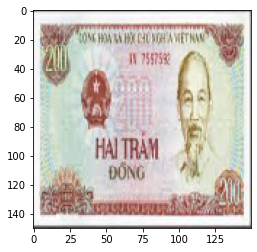

200 000 


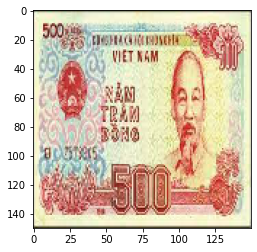

500 


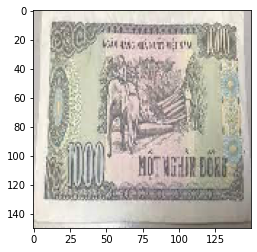

1 000


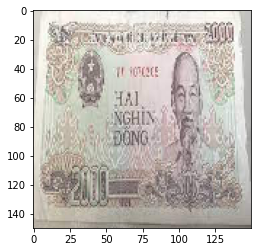

20 000 


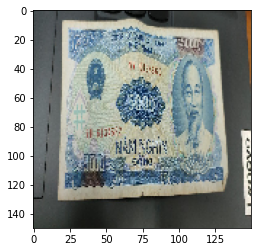

5 000 


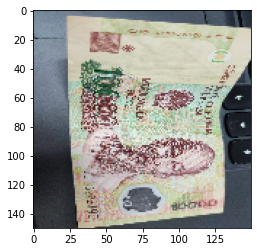

10 000


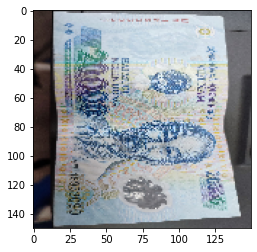

500 000 


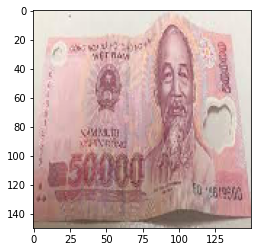

50 000 


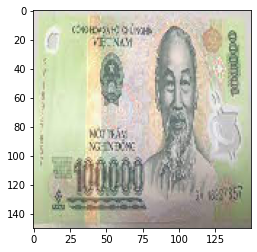

100 000


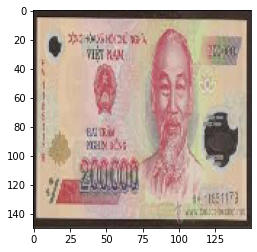

200 000 


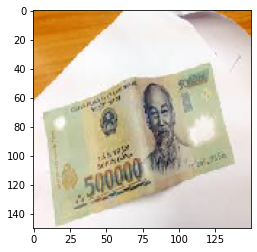

500 000 


(1, 150, 150, 3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/gdrive/MyDrive/Money/Test'
for i in range (11):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(150,150))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,150,150,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("1 000")
    elif predict==1: 
      print("10 000")
    elif predict==2: 
      print("100 000")
    elif predict==3: 
      print("200 ")
    elif predict==4: 
      print("2 000 ")
    elif predict==5: 
      print("20 000 ")
    elif predict==6: 
      print("200 000 ")
    elif predict==7: 
      print("500 ")
    elif predict==8: 
      print("5 000 ")
    elif predict==9: 
      print("50 000 ")
    elif predict==10: 
      print("500 000 ")

img.shape

In [ ]:
train_dataset.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

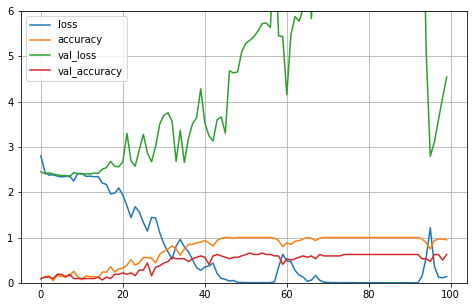

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,6)
plt.show()